   surface  nb_pieces  age  quartier    prix
0      142          5   32         3  472290
1      132          6    0         2  495843
2       54          6   18         3  253992
3      146          3   30         3  477561
4      111          2   15         1  360855


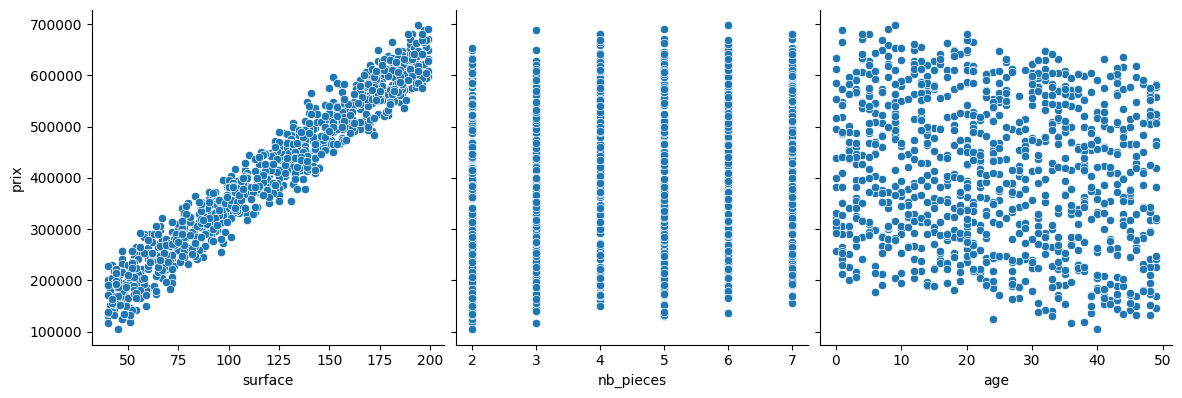

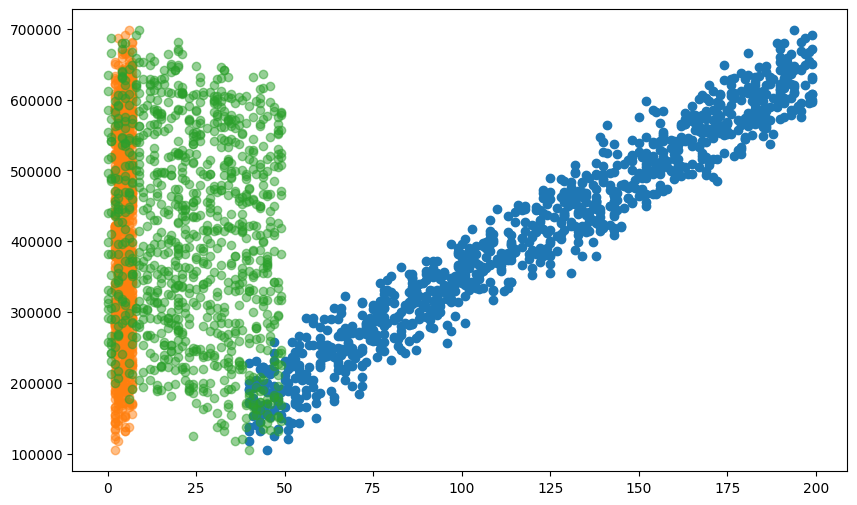

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Charger le fichier CSV
df = pd.read_csv("maisons.csv")
print(df.head())
# Séparer les caractéristiques et la cible
X = df[['surface', 'nb_pieces', 'age', 'quartier']]
y = df['prix']

#nuage des points
# Convertir les variables catégorielles en variables numériques
X = pd.get_dummies(X, columns=['quartier'], drop_first=True)
#tracer les nuages de points pour tous les attributs
import seaborn as sns
sns.pairplot(df, x_vars=['surface', 'nb_pieces', 'age'], y_vars='prix', height=4, aspect=1, kind='scatter')
#rassembler tous en un seul graphique
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))     
plt.scatter(df['surface'], df['prix'], label='Surface')
plt.scatter(df['nb_pieces'], df['prix'], label='Nombre de pièces', alpha=0.5)   
plt.scatter(df['age'], df['prix'], label='Âge', alpha=0.5)

In [5]:
#implementation de random forest
from sklearn.ensemble import RandomForestRegressor

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Entraîner le modèle de régression linéaire
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)


Évaluation du arbre decision:
✔️ MSE : 276293322.39
✔️ MAE : 13211.41
✔️ R² : 0.99
✔️ MAPE: 3.54%
✔️ RMSE: 16622.07


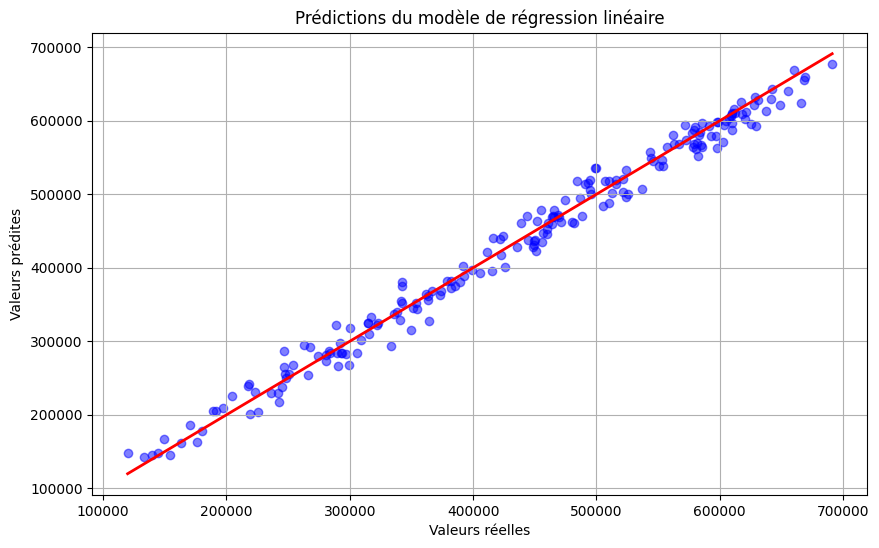

In [7]:

# Évaluation du modèle

import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


# 5. Évaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
MAE = np.mean(np.abs(y_test - y_pred))
RMSE = np.sqrt(mse)

print("Évaluation du arbre decision:")
print(f"✔️ MSE : {mse:.2f}")
print(f"✔️ MAE : {mae:.2f}")
print(f"✔️ R² : {r2:.2f}")
print(f"✔️ MAPE: {MAPE:.2f}%")
print(f"✔️ RMSE: {RMSE:.2f}")
# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Prédictions du modèle de régression linéaire')
plt.grid(True)
plt.show()